In [1]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet.models.resnet import custom_objects
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
#     config = tf.ConfigProto()
    
    config = tf.ConfigProto(
        device_count = {'GPU': 1}
    )
# sess = tf.Session(config=config)
#     config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())

Using TensorFlow backend.


processing time:  0.08021306991577148


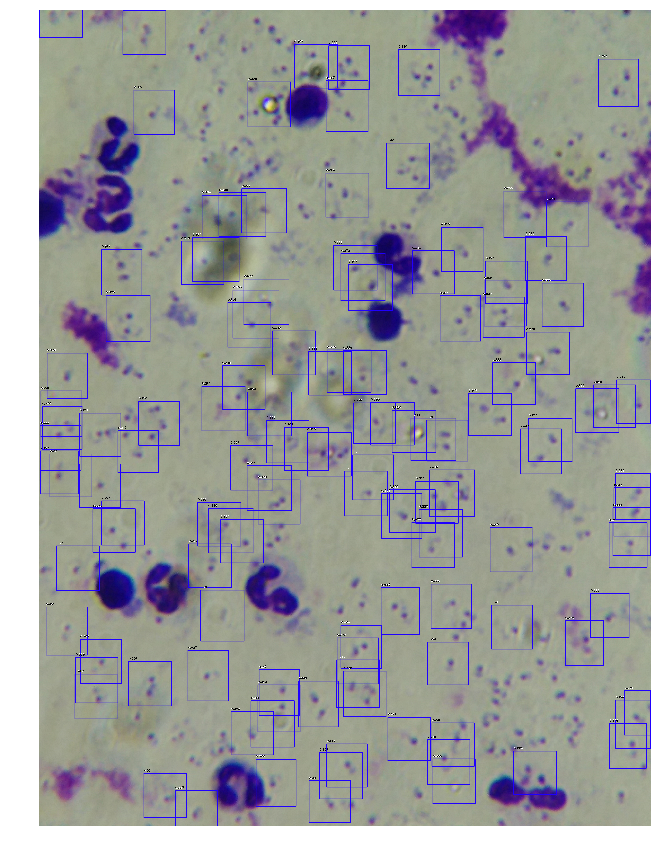

In [16]:
# load image
# m = '/media/i008/duzy/trained_models/mod-40_loss-2.0113.h5'
# model = keras.models.load_model(m, custom_objects=custom_objects)


labels_to_names = {0: 'Malaria'}

image = read_image_bgr('/home/i008/mal2.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image, min_side=750, max_side=750)

# process image
start = time.time()
_, _, boxes, nms_classification = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# compute predicted labels and scores
predicted_labels = np.argmax(nms_classification[0, :, :], axis=1)
scores = nms_classification[0, np.arange(nms_classification.shape[1]), predicted_labels]

# correct for image scale
boxes /= scale

# visualize detections
for idx, (label, score) in enumerate(zip(predicted_labels, scores)):
    if score < 0.2:
        continue
        
    color = label_color(label)

    b = boxes[0, idx, :].astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{:.3f}".format(score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()